# Simulación de un proceso ARMA y bandas de confianza

### Oscar Julian Layton

$$X_t - \phi X_{t-1}=z_t + \theta Z_{t-1}   \;\;\; con \;\;\; \{ Z_t\} \sim RB(0,\sigma^2) \;\;\;y\;\;\; (\theta+\phi\neq0), \;\;\;\;|\phi|<1$$

In [18]:
import numpy as np     
import pandas as pd
import math 
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import acf 
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels as sm

ar=np.array([1,-0.5]) ####Se debe cambiar de signo los coeficientes de la parte autoregresiva.
ma=np.array([1])  #como es AR(1), solo tiene a Z_t, por eso solo tiene a 1

np.random.seed(1)
Tlength=100
sigma=1
simul = sm.tsa.arima_process.arma_generate_sample(ar=ar,ma=ma,nsample=Tlength,sigma=1) 


# y = sm.tsa.arma_generate_sample(ar, ma, nsample=250)
# model = sm.tsa.ARMA(y, (2, 2)).fit(trend='nc', disp=0)
# model.params

C:\Users\YULY\anaconda\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: the 'sigma'' keyword is deprecated, use 'scale' instead
  from ipykernel import kernelapp as app


La simulación del proceso viene determinada por la serie de tiempo:

C:\Users\YULY\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.00000000e+00,  4.29929038e-01,  1.40050103e-01, -9.52734702e-02,
        1.38724245e-02,  9.68557925e-04,  8.82059865e-02, -8.54623492e-02,
       -4.19832076e-02,  2.09735910e-02,  1.19593906e-01,  3.72728662e-02,
       -1.86772656e-04, -1.60324475e-01, -1.55619391e-01, -4.19728032e-02,
        2.72964954e-02,  9.46069092e-02,  1.10777180e-01,  4.85723928e-02,
        2.54233400e-02,  1.11410368e-01,  1.23538937e-01,  1.38459322e-01,
        1.23685193e-01,  6.03968487e-02, -6.11334045e-02, -9.95108165e-02,
       -1.88540433e-02,  5.20409612e-02, -4.68973684e-02, -1.53895653e-01,
       -2.04419800e-01, -4.38580682e-02, -3.17779860e-02, -5.23037552e-02,
       -1.38000324e-01, -8.00184152e-02, -4.21604561e-02,  4.47889352e-02,
        6.23361410e-02,  2.65803032e-02,  8.12773319e-03,  9.63123855e-02,
        4.40119084e-02,  4.33953260e-03, -6.94993151e-02, -2.97355883e-02,
       -8.96967876e-02, -4.40322661e-02, -5.20809320e-02])

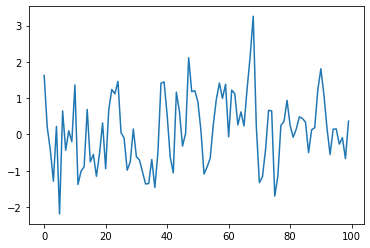

In [19]:
plt.plot(simul)
acf(simul,nlags=50,unbiased=False)

In [20]:
from statsmodels.tsa.arima_process import arma_acf    #19 y 20 permiten simular procesos arima y computar funcion de autocorrelacion teorica de procesos arma
from statsmodels.tsa.arima_process import ArmaProcess

C:\Users\YULY\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


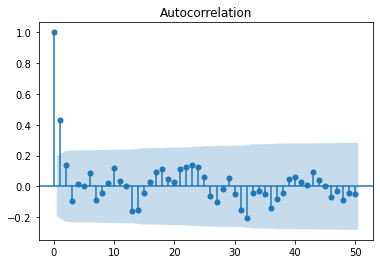

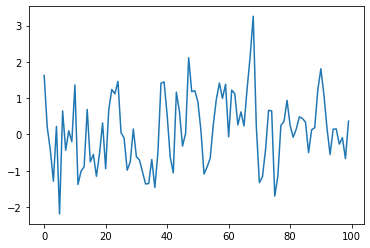

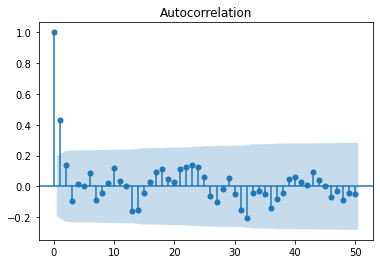

In [24]:
plt.plot(simul)
acf(simul,nlags=50,unbiased=False)
plot_acf(simul,lags=50,unbiased=False)


In [26]:
#%%##### ACF TEORICO #####
teor = arma_acf(ar,ma,20)
print(teor)
#### Con función ArmaProcess
ARMA=ArmaProcess(ar,ma)
ARMA.acf(5)

[1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01
 6.25000000e-02 3.12500000e-02 1.56250000e-02 7.81250000e-03
 3.90625000e-03 1.95312500e-03 9.76562500e-04 4.88281250e-04
 2.44140625e-04 1.22070312e-04 6.10351562e-05 3.05175781e-05
 1.52587891e-05 7.62939453e-06 3.81469727e-06 1.90734863e-06]


array([1.    , 0.5   , 0.25  , 0.125 , 0.0625])

C:\Users\YULY\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


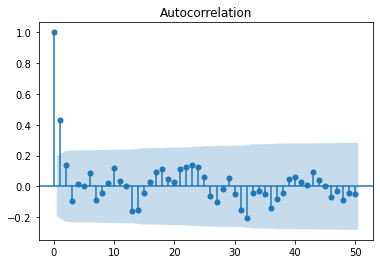

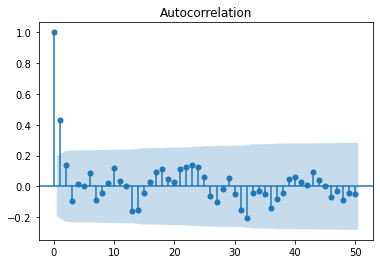

In [27]:
acf(simul,nlags=50,unbiased=False)
plot_acf(simul,lags=50,unbiased=False)
